In [54]:
import pandas as pd


In [53]:
df=pd.read_csv('/content/Obesity.csv')

In [52]:
print(data.columns)



Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

clf.fit(X_train, y_train_encoded)

y_pred = clf.predict(X_test)

y_pred_original = le.inverse_transform(y_pred)



In [56]:
#importing the libraries needed
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

#reading the data
data = pd.read_csv("/content/Obesity.csv")
#Features and Target Variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

#Defining Categorical and Numerical Features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

#two pipelines for preprocessing have been developed
#one for numerical features (scaling them using StandardScaler) and one for categorical features (encoding them using OneHotEncoder).
# Then, we combine these pipelines using ColumnTransformer.


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

#Constructing the Model Pipeline:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier())])
#Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Encoding Target Variable:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

#Fitting the Model
clf.fit(X_train, y_train_encoded)
#Making Predictions
y_pred = clf.predict(X_test)

#nverse Transforming Predictions
y_pred_original = le.inverse_transform(y_pred)

#Printing Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
print("\nClassification Report:\n", classification_report(y_test, y_pred_original))


Confusion Matrix:
 [[55  1  0  0  0  0  0]
 [ 5 51  0  0  0  6  0]
 [ 0  0 75  2  0  1  0]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 54  0]
 [ 0  0  0  0  0  2 48]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.98      0.95        56
      Normal_Weight       0.94      0.82      0.88        62
     Obesity_Type_I       0.97      0.96      0.97        78
    Obesity_Type_II       0.97      0.97      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.86      0.96      0.91        56
Overweight_Level_II       1.00      0.96      0.98        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



Checking if the model is working fine or not

Confusion Matrix:
 [[55  1  0  0  0  0  0]
 [ 5 51  0  0  0  6  0]
 [ 0  0 75  2  0  1  0]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 54  0]
 [ 0  0  0  0  0  2 48]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.98      0.95        56
      Normal_Weight       0.94      0.82      0.88        62
     Obesity_Type_I       0.97      0.96      0.97        78
    Obesity_Type_II       0.97      0.97      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.86      0.96      0.91        56
Overweight_Level_II       1.00      0.96      0.98        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423


Accuracy: 0.950354609929078


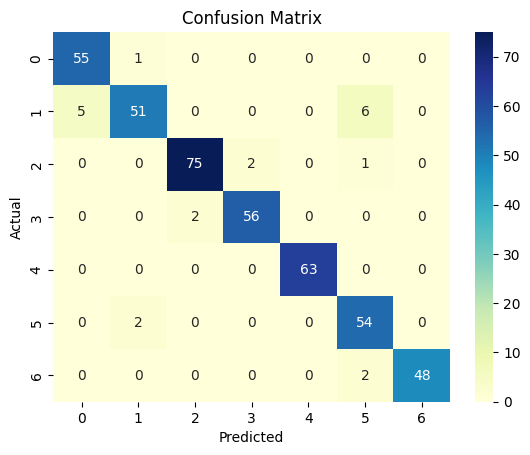

In [45]:
from sklearn.metrics import accuracy_score

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_original))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_original))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_original)
print("\nAccuracy:", accuracy)

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_original), annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


predicting output by giving random input for checking the model

In [51]:
#Importing numpy
import numpy as np

#Generating Random Data
random_data = {
    'Gender': np.random.choice(['Female', 'Male']),
    'Age': np.random.randint(18, 70),
    'Height': np.random.randint(140, 210),
    'Weight': np.random.randint(40, 150),
    'family_history_with_overweight': np.random.choice(['yes', 'no']),
    'FAVC': np.random.choice(['yes', 'no']),
    'FCVC': np.random.rand(),
    'NCP': np.random.randint(1, 7),
    'CAEC': np.random.choice(['no', 'Sometimes', 'Frequently', 'Always']),
    'SMOKE': np.random.choice(['yes', 'no']),
    'CH2O': np.random.rand() * 2 + 1,  #  normal water intake ranges from 1 to 3 liters
    'SCC': np.random.choice(['yes', 'no']),
    'FAF': np.random.randint(0, 24),
    'TUE': np.random.randint(0, 24),
    'CALC': np.random.choice(['no', 'Sometimes', 'Frequently', 'Always']),
    'MTRANS': np.random.choice(['Automobile', 'Motorbike', 'Bike', 'Public_Transportation', 'Walking'])
}
#Creating a DataFrame from Random Data
random_df = pd.DataFrame([random_data])

#Predicting Weight Category:
predicted_category = clf.predict(random_df)

#Inverse Transforming Predictions:
predicted_category_original = le.inverse_transform(predicted_category)
#Printing Random Data and Predicted Weight Category
print("Random Data:")
print(random_df)
print("\nPredicted Weight Category:", predicted_category_original[0])


Random Data:
  Gender  Age  Height  Weight family_history_with_overweight FAVC      FCVC  \
0   Male   33     208      55                             no  yes  0.045868   

   NCP    CAEC SMOKE     CH2O SCC  FAF  TUE       CALC                 MTRANS  
0    5  Always    no  1.55545  no   14   18  Sometimes  Public_Transportation  

Predicted Weight Category: Insufficient_Weight


The selected model is  XGBoost classifier,it is basically an implementation of gradient boosting.


XGBoost is a powerful and flexible algorithm for supervised learning tasks, particularly suitable for classification and regression problems with structured data. It combines gradient boosting with various optimization techniques to achieve high performance and robustness.



And also the robustness of the model is very high,so beacuse of all of these ,have used XGBoost classifier.